In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.layers import Dense

In [10]:
# Loading the Data

In [11]:
(x,y), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


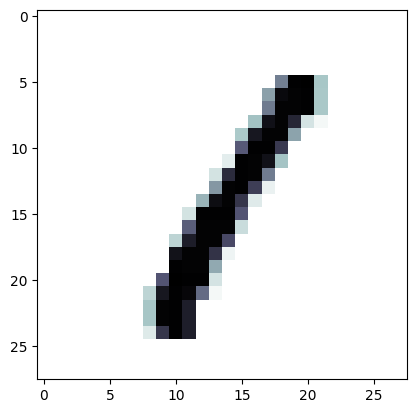

In [37]:
plt.imshow(x[3], cmap ='bone_r' )

In [ ]:
#plt.imshow(x_test[0],cmap=plt.cm.binary)

In [ ]:
print(x.shape)

(60000, 28, 28)


In [ ]:
print(y.shape)

(60000,)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
print(y_test.shape)

(10000,)


In [ ]:
# Preprocessing the MNIST data

In [ ]:
image_height, image_width = 28, 28

In [ ]:
x = x.reshape(60000, image_height*image_width)
print(x.shape)

(60000, 784)


In [ ]:
x_test = x_test.reshape(10000, image_height*image_width)
print(x_test.shape)

(10000, 784)


In [ ]:
print(x[0])
x = x.astype('float32')
x_test = x_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
x /= 255.0
x_test /= 255.0
print(x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
print(y.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
y = to_categorical(y, 10)
y_test = to_categorical(y_test, 10)
print(y.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
# Creating the Model:

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Compliling the model

In [ ]:
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

In [ ]:
history = model.fit(x,y, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5606 - accuracy: 0.8603 - val_loss: 0.2984 - val_accuracy: 0.9183
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2744 - accuracy: 0.9221 - val_loss: 0.2334 - val_accuracy: 0.9345
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2234 - accuracy: 0.9362 - val_loss: 0.1958 - val_accuracy: 0.9419
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1889 - accuracy: 0.9462 - val_loss: 0.1711 - val_accuracy: 0.9505
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1630 - accuracy: 0.9535 - val_loss: 0.1532 - val_accuracy: 0.9540
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1432 - accuracy: 0.9596 - val_loss: 0.1380 - val_accuracy: 0.9596
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1276 - accuracy: 0.9638 - val_loss: 0.1261 - val_ac

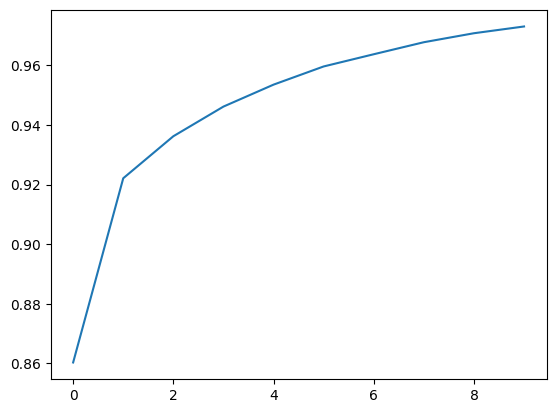

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
# Plotting training model's accuracy

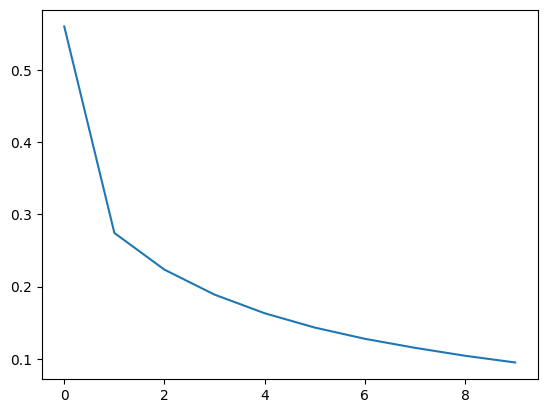

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
# Acuuracy of Training and Validation with Loss

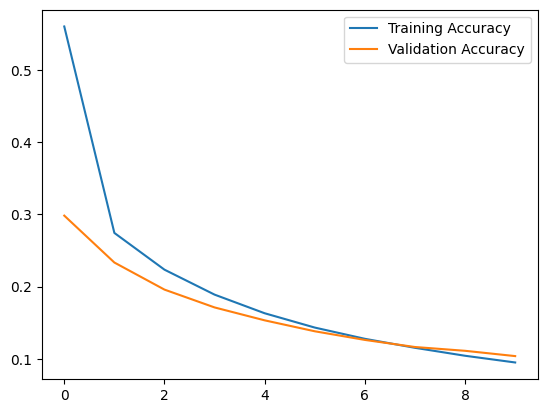

In [ ]:
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluating the Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape = (224,224,3))

cnn = Sequential()
cnn.add(base_model)

cnn.add(Conv2D(64, kernel_size = (4,4), input_shape = (28,28,1), padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128, kernel_size = (4,4), padding = 'same', activation = 'relu'))     # HIDDEN LAYER
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024, activation = 'relu'))
cnn.add(Dense(10, activation = 'softmax'))


In [ ]:
history = model.fit(x_test, y_test, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0360 - accuracy: 0.9934 - val_loss: 0.0327 - val_accuracy: 0.9949
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0341 - accuracy: 0.9941 - val_loss: 0.0313 - val_accuracy: 0.9954
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0326 - accuracy: 0.9949 - val_loss: 0.0296 - val_accuracy: 0.9957
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0309 - accuracy: 0.9950 - val_loss: 0.0290 - val_accuracy: 0.9960
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0299 - accuracy: 0.9955 - val_loss: 0.0275 - val_accuracy: 0.9969
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.0284 - accuracy: 0.9961 - val_loss: 0.0265 - val_accuracy: 0.9968
Epoch 7/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0273 - accuracy: 0.9962 - val_loss: 0.0251 - val_accuracy: 0.9970
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.9991


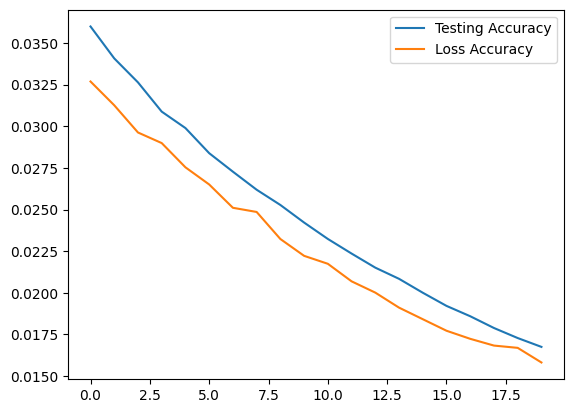

In [ ]:
plt.plot(history.history['loss'], label = 'Testing Accuracy')
plt.plot(history.history['val_loss'], label = 'Loss Accuracy')
plt.legend()
plt.show()

In [ ]:
score

[0.015815095975995064, 0.9991000294685364]

In [ ]:
# CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 [==============================] - 1s 2ms/step


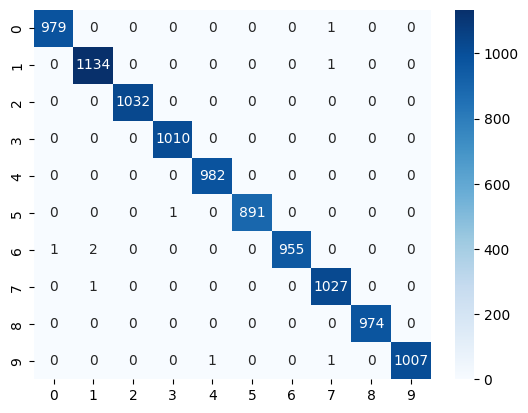

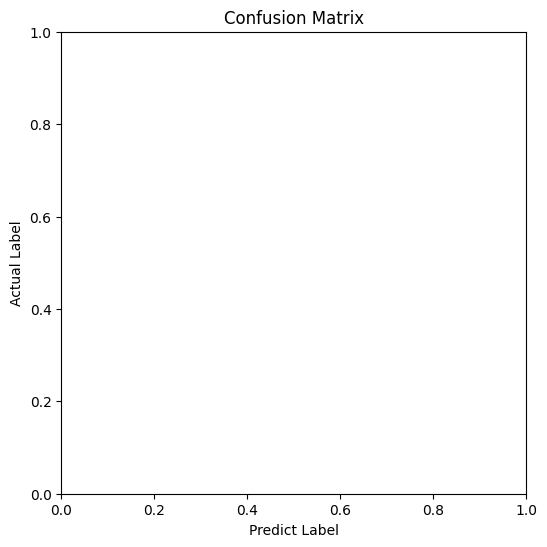

In [ ]:
y_pred = model.predict(x_test)
y_test_labels = np.argmax(y_test, axis = 1)
y_pred_labels = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

plt.figure(figsize = (6,6))
plt.ylabel('Actual Label')
plt.xlabel('Predict Label')
plt.title('Confusion Matrix')
plt.show()